In [9]:
# Importação das bibliotecas Python
import os
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Importação das bibiotecas do Sklearn
from sklearn.preprocessing import LabelEncoder

In [10]:
# Importação das bibliotecas Graficas
import seaborn as sns
#import scikitplot as skplt
import matplotlib.pyplot as plt

# Exibe gráficos na página (inline)
%matplotlib inline

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
#pd.options.display.max_columns = 116
#pd.options.display.max_rows = 116

In [3]:
def concatenar_csv(diretorio, arquivo_saida):

    # Lista para armazenar os DataFrames de cada arquivo CSV
    dfs = []

    # Percorre todos os arquivos no diretório especificado
    for arquivo in os.listdir(diretorio):
        # Verifica se o arquivo é um CSV
        if arquivo.endswith('.csv'):
            # Gera o caminho completo para o arquivo
            caminho_completo = os.path.join(diretorio, arquivo)
            # Lê o arquivo CSV e o armazena em um DataFrame
            df = pd.read_csv(caminho_completo)
            # Adiciona o DataFrame à lista
            dfs.append(df)

    # Concatena todos os DataFrames da lista em um único DataFrame
    df_final = pd.concat(dfs, ignore_index=True)

    # Salva o DataFrame concatenado em um arquivo CSV
    caminho_completo_saida = os.path.join(diretorio, arquivo_saida)
    df_final.to_csv(caminho_completo_saida, index=False)

In [5]:
caminho = '../datasets/dacoga/'
concatenar_csv(caminho, 'dsetNbaiotFull.csv')

In [6]:
df = pd.read_csv('../datasets/dacoga/dsetNbaiotFull.csv')

In [7]:
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Device_Name,Attack,Attack_subType,label
0,34.601760,398.908959,52550.382469,67.717384,403.302501,51712.306449,290.361681,371.306909,56847.712817,3664.475330,...,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,Provision_PT_838_Security_Camera,mirai,udp,Anomaly
1,166.897264,74.093675,2.239427,271.018503,74.076204,1.823122,802.782759,74.053501,1.405218,7073.265995,...,74.0,9.536743e-07,95.268043,9.094947e-13,0.0,0.0,Provision_PT_838_Security_Camera,gafgyt,combo,Anomaly
2,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,Provision_PT_838_Security_Camera,gafgyt,tcp,Anomaly
3,81.573509,361.922677,57800.777918,138.807560,321.869667,60673.771150,426.539988,314.707208,60910.274988,3941.072685,...,554.0,0.000000e+00,554.000000,0.000000e+00,0.0,0.0,Provision_PT_838_Security_Camera,mirai,udp,Anomaly
4,142.893002,65.017844,45.078160,202.254552,65.919080,47.843152,449.879100,67.102984,49.018986,3714.410039,...,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,Provision_PT_838_Security_Camera,mirai,syn,Anomaly


In [8]:
print('The dataset shape = ',df.shape)

The dataset shape =  (6451892, 119)


Attack_subType
udp         1959331
tcp          859850
scan         689469
syn          615171
Normal       555932
ack          552698
combo        515156
udpplain     442496
junk         261789
Name: count, dtype: int64

Ataques representam 0.0000% do dataset.



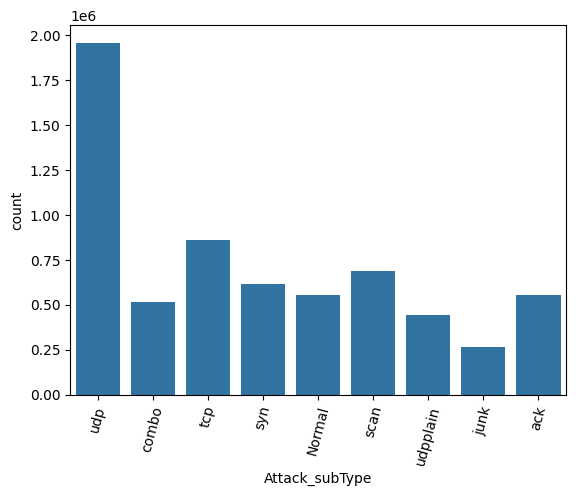

In [13]:
# Verificar o balanceamento das classes
print(df.Attack_subType.value_counts())
print("\nAtaques representam {:.4f}% do dataset.\n".
      format((df[df.Attack_subType == 'Anomaly'].shape[0] / df.shape[0]) * 100))

# Plotar gráfico de barras para as Classes
sns.countplot(x=df['Attack_subType'])
plt.xticks(rotation=75)  # Inclinar os rótulos do eixo x em 75 graus
plt.show()  # Exibir o gráfico

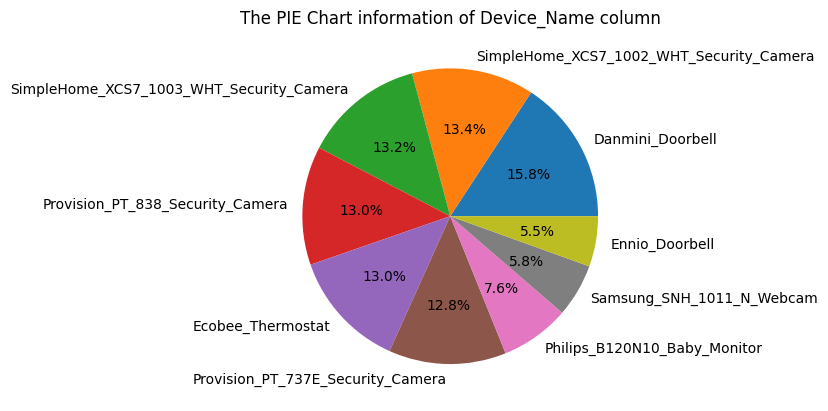

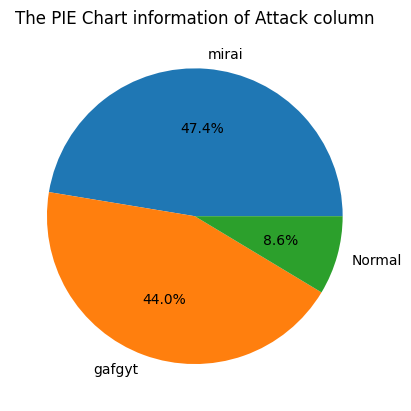

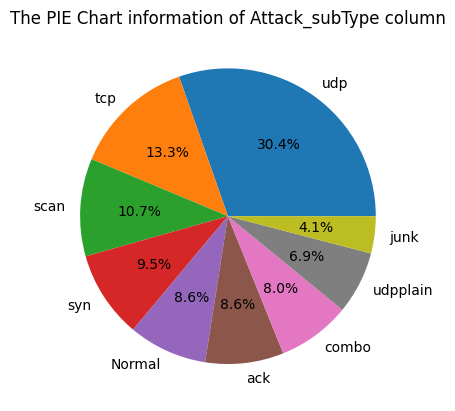

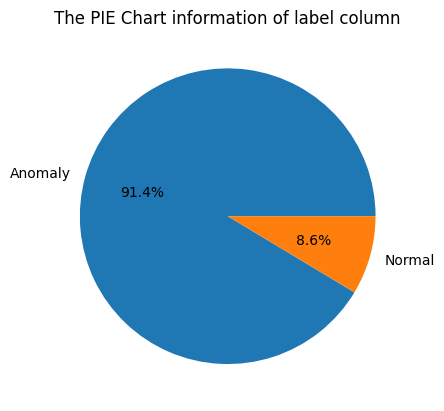

In [14]:
for i in df.select_dtypes(include='object').columns.values:
    if len(df[i].value_counts()) <=10:
        val=df[i].value_counts().values
        index=df[i].value_counts().index
        plt.pie(val,labels=index,autopct='%1.1f%%')
        plt.title(f'The PIE Chart information of {i} column')
        plt.show()

In [15]:
for i in df.select_dtypes(include='object').columns.values:
    print(df[i].value_counts())
    print("--------------------------------")

Device_Name
Danmini_Doorbell                            1018298
SimpleHome_XCS7_1002_WHT_Security_Camera     863056
SimpleHome_XCS7_1003_WHT_Security_Camera     850826
Provision_PT_838_Security_Camera             836891
Ecobee_Thermostat                            835876
Provision_PT_737E_Security_Camera            828260
Philips_B120N10_Baby_Monitor                 487963
Samsung_SNH_1011_N_Webcam                    375222
Ennio_Doorbell                               355500
Name: count, dtype: int64
--------------------------------
Attack
mirai     3057688
gafgyt    2838272
Normal     555932
Name: count, dtype: int64
--------------------------------
Attack_subType
udp         1959331
tcp          859850
scan         689469
syn          615171
Normal       555932
ack          552698
combo        515156
udpplain     442496
junk         261789
Name: count, dtype: int64
--------------------------------
label
Anomaly    5895960
Normal      555932
Name: count, dtype: int64
-----------------